<img src="logo.png">

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Gráficos categóricos

### Bar Plot:

In [2]:
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:xlabel='species', ylabel='sepal_length'>

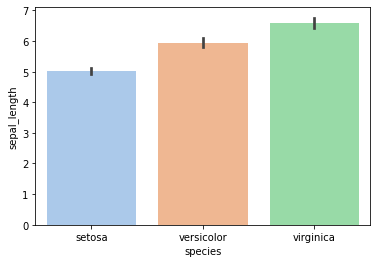

In [3]:
fig, axes = plt.subplots(figsize=(6,4))
sns.barplot(x=df["species"], y=df["sepal_length"], palette="pastel",data=df,ax=axes,estimator=np.mean)

<AxesSubplot:xlabel='species', ylabel='petal_length'>

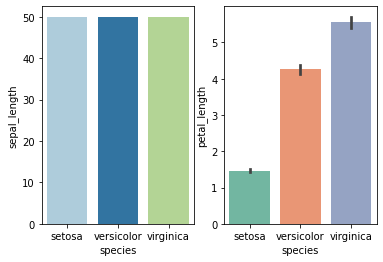

In [5]:
fig, axes = plt.subplots(1,2,figsize=(6,4))
sns.barplot(x=df["species"], y=df["sepal_length"], palette="Paired",data=df,ax=axes[0],estimator=np.count_nonzero)
sns.barplot(x=df["species"], y=df["petal_length"], palette="Set2",data=df,ax=axes[1],estimator=np.mean)

### Boxplot:

In [6]:
planets = sns.load_dataset("planets")
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


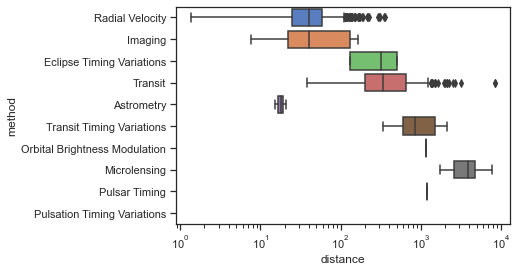

In [8]:
sns.set(style="ticks", palette="muted")
ax = sns.boxplot(x="distance", y="method", data=planets)
ax.set_xscale("log")

### Violin Plot:

In [10]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='time', ylabel='total_bill'>

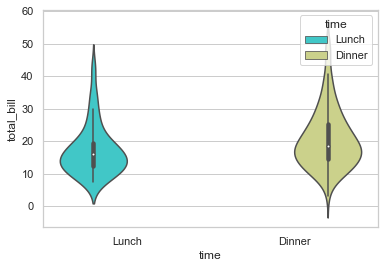

In [13]:
sns.set(style="whitegrid")
sns.violinplot(x="time",y="total_bill", data=tips, palette="rainbow")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

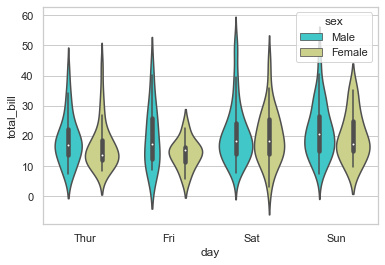

In [14]:
sns.violinplot(x="day",y="total_bill", data=tips, palette="rainbow", hue='sex')

#### Grouped violinplots with split violins

<AxesSubplot:xlabel='day', ylabel='total_bill'>

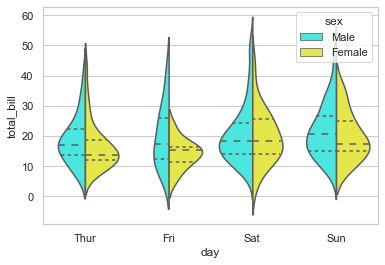

In [16]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True,inner="quart",
               palette={"Male": "#33FFF8", "Female": "#FDFF33"})

### Scatter Plot Matrix: Pairplot () function

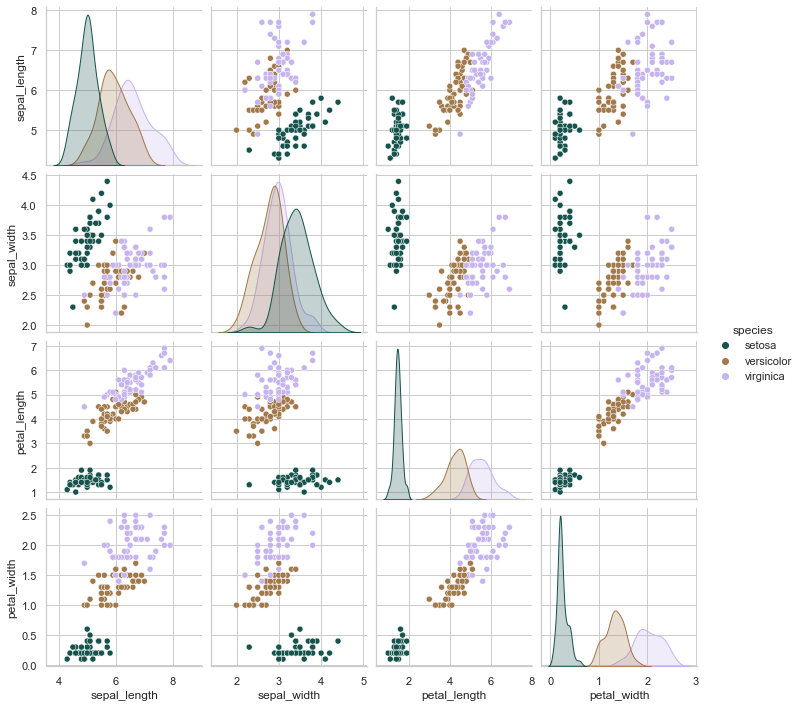

In [17]:
sns.pairplot(df, hue="species", palette='cubehelix')

### Cat Plot: función general de generación de gráficos en seaborn

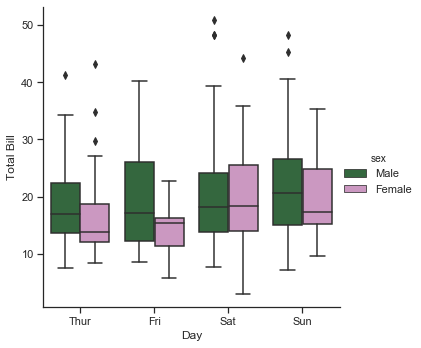

In [12]:
sns.set(style="ticks")
g = sns.catplot("day", "total_bill", "sex", data=tips, kind="box", palette='cubehelix')
g.set_axis_labels("Day", "Total Bill")

## Facet Grid

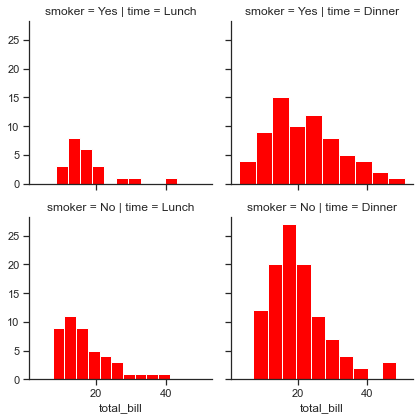

In [19]:
sns.set(style="ticks")
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill", color='red')

### Change the size and aspect ratio of each facet:

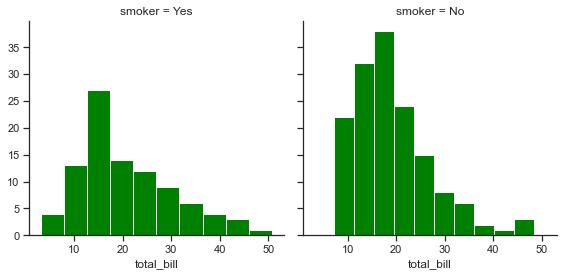

In [20]:
g = sns.FacetGrid(tips, col="smoker", col_order=["Yes", "No"], height=4, aspect=1)
g.map(plt.hist, "total_bill", color="green")

### Setting the color palette:

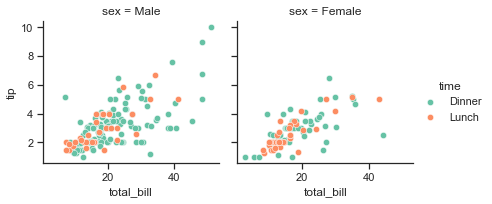

In [21]:
kws = dict(s=40, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(tips, col="sex", hue="time", palette="Set2", hue_order=["Dinner", "Lunch"])
g = g.map(plt.scatter, "total_bill", "tip", **kws).add_legend()

### Use a different marker for the hue levels:

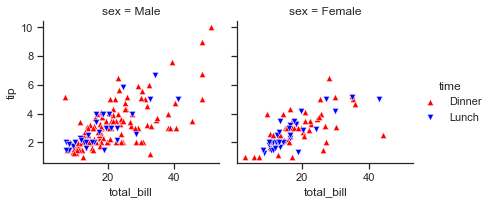

In [22]:
palette = dict(Lunch="blue", Dinner="red")
g = sns.FacetGrid(tips, col="sex", hue="time", palette=palette,
                  hue_order=["Dinner", "Lunch"],
                  hue_kws=dict(marker=["^", "v"]))
g = g.map(plt.scatter, "total_bill", "tip", **kws).add_legend()

### Use different axes labels after plotting:

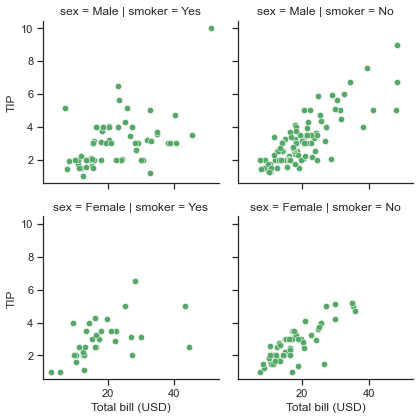

In [24]:
g = sns.FacetGrid(tips, col="smoker", row="sex")
g = g.map(plt.scatter, "total_bill", "tip", color="g", **kws).set_axis_labels("Total bill (USD)", "TIP")

## Reference:

http://seaborn.pydata.org/tutorial/categorical.html

https://seaborn.pydata.org/tutorial/color_palettes.html